# SVM

https://towardsdatascience.com/a-friendly-introduction-to-support-vector-machines-svm-925b68c5a079
https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

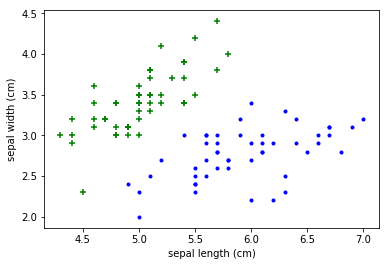

In [21]:
import pandas as pd
from sklearn.datasets import load_iris
iris =load_iris()
dir(iris) #['DESCR', 'data', 'feature_names', 'target', 'target_names']
iris.feature_names

df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()
df['target']=iris.target #append target column
df.head()

iris.target_names #array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

df[df.target==2].head()

df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

# Visualization

from matplotlib import pyplot as plt
%matplotlib inline

df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

df2

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color='blue', marker='.')

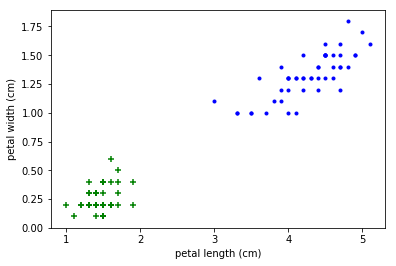

In [22]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='blue', marker='.')

In [37]:
from sklearn.model_selection import train_test_split
X=df.drop(['target','flower_name'], axis='columns')
X.head()
Y=df.target

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
len(x_train) #120
len(x_test) #30

from sklearn.svm import SVC
model=SVC(C=10) # by C value score will reduse and C means regularization
#model=SVC(gamma=100) # by gamma it will reduse to 46%
#model=SVC(kernel='linear') # default is rbf . score will be 1
model.fit(x_train,y_train)
model.score(x_test,y_test) #1


1.0

In [ ]:
#Parameter Tuning with GridSearch
#https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a

grid = GridSearchCV(estimator, param_grid, scoring, cv)
    
#K -Fold Cross validation is the technique where we keep a part of dataset and do not train on it and use that part 
#for testing or validation.
#Grid Search : This is used to tune our hyperparameters and get the best set of parameters

#The question is how GridSearch and Cross Validation are inter linked. Is it necessary that I have to use both of them 
#simultaneously or I can use them independently.

#Please explain how this below line is evaluated :
grid = GridSearchCV(estimator=lasso_clf, model_grid, cv=LeaveOneOut(train.shape[0]),scoring=‘mean_squared_error’)

#You can just cross validate your model using k-fold or if you use another technique for validation you can just use grid 
#search to find the optimum parameters for your model. The reason we link both is usually you want to cross validate your
#model and want to have best parameters too at the same time(machine learning competitions).

#The simplified syntax for grid search in sklearn is

  clf = GridSearchCV(estimator, param_grid, scoring, cv)
#Where estimator is your model and parameters are options you want to set for your grid search. Including options like 
#param_grid, this is a dictionary of parameters you want to run your search for, etc.

#Coming to your code,

 grid = GridSearchCV(estimator=lasso_clf, model_grid,
#You are creating a grid search for a model lasso_clf and model_grid is your parameters for the search.

  cv=LeaveOneOut(train.shape[0]),scoring=‘mean_squared_error’)
#here cv tells how you want to split your dataset for validation. scoring is the metric you are using to test your model’s
#accuracy, in this case since it is regression model you have used mean_squared_error as the metric.

In [ ]:
########################## Exercise #######################
#Digits datsets 